In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('power_data.xlsx', skiprows=9)
df

,Engineering Units:,MW,L/HR
0,2023-05-01 15:00:00,31.004971,0.00000
1,2023-05-01 16:00:00,31.054153,0.00000
2,2023-05-01 17:00:00,31.094471,0.00000
3,2023-05-01 18:00:00,31.212444,0.00000
4,2023-05-01 19:00:00,31.610483,0.00000
...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000
2589,2023-08-17 12:00:00,34.486267,673.26282
2590,2023-08-17 13:00:00,35.054607,816.41357
2591,2023-08-17 14:00:00,34.596741,814.90936


In [105]:
df.columns

Index(['Engineering Units:', 'MW', 'L/HR'], dtype='object')

In [106]:
df.rename(columns={'Engineering Units:':'Date', 'MW': 'Gross Power Generated (MW)', 'L/HR': 'Sprint System (L/HR)'}, inplace=True)

In [107]:
df

,Date,Gross Power Generated (MW),Sprint System (L/HR)
0,2023-05-01 15:00:00,31.004971,0.00000
1,2023-05-01 16:00:00,31.054153,0.00000
2,2023-05-01 17:00:00,31.094471,0.00000
3,2023-05-01 18:00:00,31.212444,0.00000
4,2023-05-01 19:00:00,31.610483,0.00000
...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000
2589,2023-08-17 12:00:00,34.486267,673.26282
2590,2023-08-17 13:00:00,35.054607,816.41357
2591,2023-08-17 14:00:00,34.596741,814.90936


# analysis

sprint system = 0 means off

- Power generated off vs on

In [108]:
from matplotlib import pyplot as plt


In [109]:
df.dtypes

Date                          datetime64[ns]
Gross Power Generated (MW)           float64
Sprint System (L/HR)                 float64
dtype: object

In [110]:
df

,Date,Gross Power Generated (MW),Sprint System (L/HR)
0,2023-05-01 15:00:00,31.004971,0.00000
1,2023-05-01 16:00:00,31.054153,0.00000
2,2023-05-01 17:00:00,31.094471,0.00000
3,2023-05-01 18:00:00,31.212444,0.00000
4,2023-05-01 19:00:00,31.610483,0.00000
...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000
2589,2023-08-17 12:00:00,34.486267,673.26282
2590,2023-08-17 13:00:00,35.054607,816.41357
2591,2023-08-17 14:00:00,34.596741,814.90936


In [111]:
df.columns

Index(['Date', 'Gross Power Generated (MW)', 'Sprint System (L/HR)'], dtype='object')

In [112]:
sprinter_off = df[df['Sprint System (L/HR)'] == 0]
sprinter_off

,Date,Gross Power Generated (MW),Sprint System (L/HR)
0,2023-05-01 15:00:00,31.004971,0.0
1,2023-05-01 16:00:00,31.054153,0.0
2,2023-05-01 17:00:00,31.094471,0.0
3,2023-05-01 18:00:00,31.212444,0.0
4,2023-05-01 19:00:00,31.610483,0.0
...,...,...,...
2584,2023-08-17 07:00:00,38.559807,0.0
2585,2023-08-17 08:00:00,36.584957,0.0
2586,2023-08-17 09:00:00,34.297020,0.0
2587,2023-08-17 10:00:00,32.066364,0.0


In [113]:
sprinter_on = df[df['Sprint System (L/HR)'] != 0]
sprinter_on

,Date,Gross Power Generated (MW),Sprint System (L/HR)
382,2023-05-17 13:00:00,36.136127,12.975883
383,2023-05-17 14:00:00,39.404217,343.742100
384,2023-05-17 15:00:00,35.954567,327.260860
385,2023-05-17 16:00:00,36.457844,417.558290
386,2023-05-17 17:00:00,24.119740,402.147490
...,...,...,...
2578,2023-08-17 01:00:00,39.079834,502.592860
2589,2023-08-17 12:00:00,34.486267,673.262820
2590,2023-08-17 13:00:00,35.054607,816.413570
2591,2023-08-17 14:00:00,34.596741,814.909360


In [114]:
df.describe()

,Gross Power Generated (MW),Sprint System (L/HR)
count,2593.000000,2593.000000
mean,36.254574,192.829586
std,5.723589,340.764203
min,0.000000,0.000000
25%,35.132961,0.000000
50%,37.358269,0.000000
75%,38.951992,161.029210
max,42.024609,863.298030


In [115]:
avg_power_on = sprinter_on['Gross Power Generated (MW)'].mean()
avg_power_on

37.936101969163

In [116]:
avg_power_off = sprinter_off['Gross Power Generated (MW)'].mean()
avg_power_off

35.65566166929916

In [117]:
import seaborn as sns

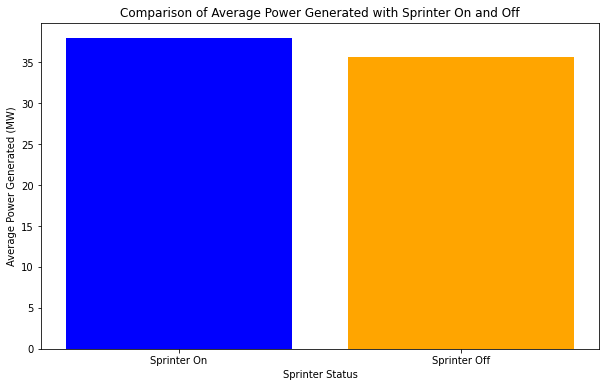

In [197]:
sprinters = ['Sprinter On', 'Sprinter Off']
average_power = [avg_power_on, avg_power_off]

# Increase the figure size
plt.figure(figsize=(10, 6))

plt.bar(sprinters, average_power, color=['blue', 'orange'])
plt.xlabel('Sprinter Status')
plt.ylabel('Average Power Generated (MW)')
plt.title('Comparison of Average Power Generated with Sprinter On and Off')
plt.show()


This chart looks at the average power generated when the sprinter is on vs off. When it is on it is a value of 37.94MW and when it is off, 36.66MW

- sprinter off has 1912 values
- spinrter on has 681 values

The difference between the sprinter being on and off is approximately 1MW which may not be worth it as it costs to have the sprinter on and the return is only 6%

In [119]:
((37.936101969163 - 35.65566166929916)/37.936101969163) * 100

6.01126679203239

COMPARE ON vs OFF

In [99]:
df

,Date,Gross Power Generated (MW),Sprint System (L/HR)
0,2023-05-01 15:00:00,31.004971,0.00000
1,2023-05-01 16:00:00,31.054153,0.00000
2,2023-05-01 17:00:00,31.094471,0.00000
3,2023-05-01 18:00:00,31.212444,0.00000
4,2023-05-01 19:00:00,31.610483,0.00000
...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000
2589,2023-08-17 12:00:00,34.486267,673.26282
2590,2023-08-17 13:00:00,35.054607,816.41357
2591,2023-08-17 14:00:00,34.596741,814.90936


In [175]:
def check_is_on(value):
    if value == 0:
        return False
    else:
        return True

df['is_on'] = df['Sprint System (L/HR)'].apply(check_is_on)


In [176]:
df

,Date,Gross Power Generated (MW),Sprint System (L/HR),is_on
0,2023-05-01 15:00:00,31.004971,0.00000,False
1,2023-05-01 16:00:00,31.054153,0.00000,False
2,2023-05-01 17:00:00,31.094471,0.00000,False
3,2023-05-01 18:00:00,31.212444,0.00000,False
4,2023-05-01 19:00:00,31.610483,0.00000,False
...,...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000,False
2589,2023-08-17 12:00:00,34.486267,673.26282,True
2590,2023-08-17 13:00:00,35.054607,816.41357,True
2591,2023-08-17 14:00:00,34.596741,814.90936,True


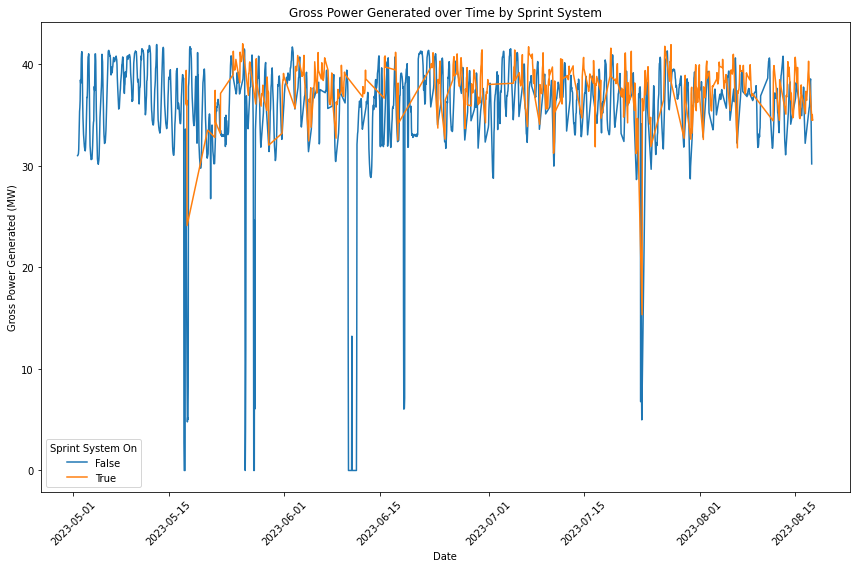

In [177]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

sns.lineplot(data=df, x="Date", y="Gross Power Generated (MW)", hue='is_on')
plt.xlabel('Date')
plt.ylabel('Gross Power Generated (MW)')
plt.title('Gross Power Generated over Time by Sprint System')
plt.legend(title='Sprint System On')
plt.xticks(rotation=45)  
plt.tight_layout()  # Ensure labels are not cut off
plt.show()




Cannnot see clearly so get rid of any values below 25 which is around 60 data points of out 2000+

In [178]:
df.columns

Index(['Date', 'Gross Power Generated (MW)', 'Sprint System (L/HR)', 'is_on'], dtype='object')

In [179]:
df[df['Gross Power Generated (MW)'] < 25].count()

Date                          60
Gross Power Generated (MW)    60
Sprint System (L/HR)          60
is_on                         60
dtype: int64

In [180]:
df_above_25 = df[df['Gross Power Generated (MW)'] > 25]
df_above_25

,Date,Gross Power Generated (MW),Sprint System (L/HR),is_on
0,2023-05-01 15:00:00,31.004971,0.00000,False
1,2023-05-01 16:00:00,31.054153,0.00000,False
2,2023-05-01 17:00:00,31.094471,0.00000,False
3,2023-05-01 18:00:00,31.212444,0.00000,False
4,2023-05-01 19:00:00,31.610483,0.00000,False
...,...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000,False
2589,2023-08-17 12:00:00,34.486267,673.26282,True
2590,2023-08-17 13:00:00,35.054607,816.41357,True
2591,2023-08-17 14:00:00,34.596741,814.90936,True


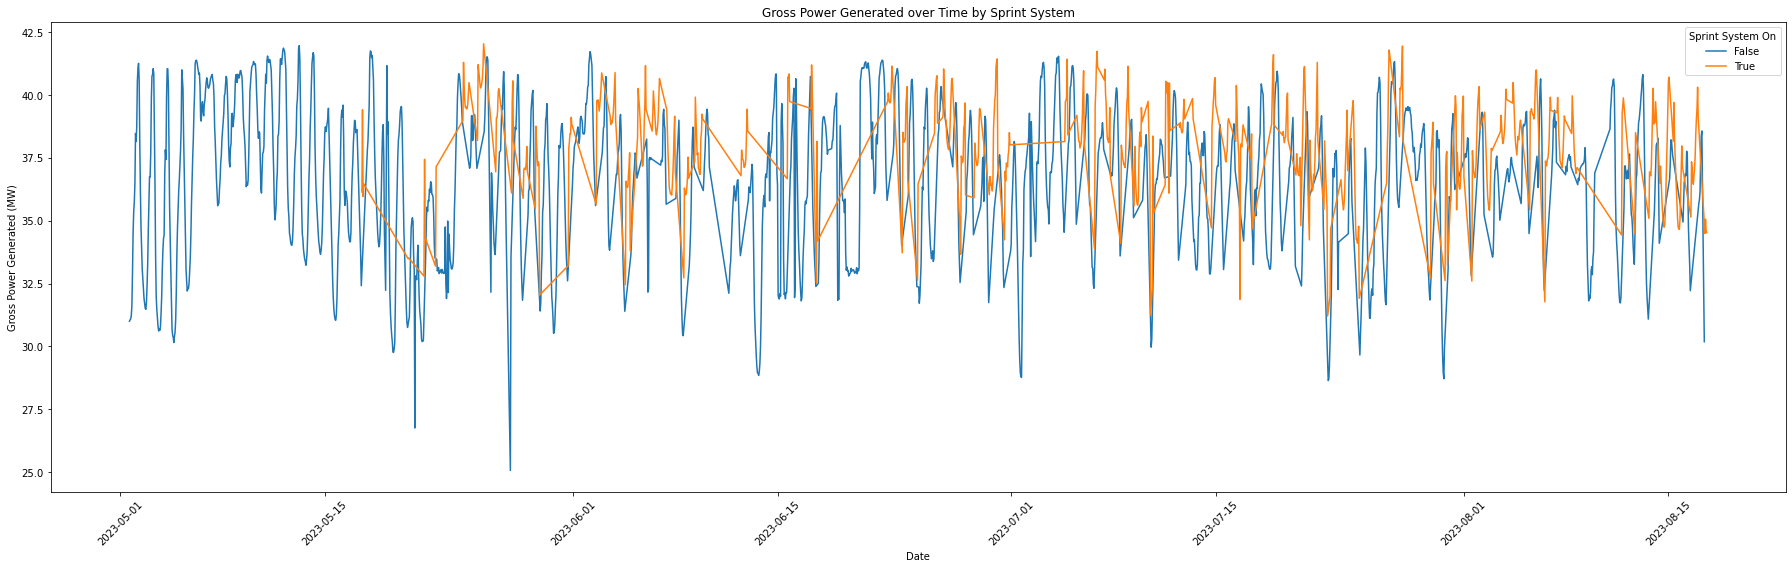

In [190]:
plt.figure(figsize=(25, 8))  
sns.lineplot(data=df_above_25, x="Date", y="Gross Power Generated (MW)", hue='is_on')
plt.xlabel('Date')
plt.ylabel('Gross Power Generated (MW)')
plt.title('Gross Power Generated over Time by Sprint System')
plt.legend(title='Sprint System On')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

More or less similar trend, with the sprinter on being higher

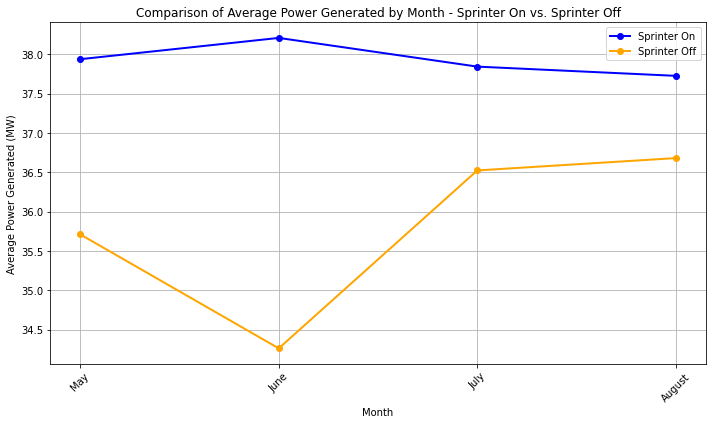

In [199]:
# Create a new column 'Month' based on the 'Date' column
df['Month'] = df['Date'].dt.month

# Calculate the average power for each month and Sprinter status
average_power_by_month_sprinter_on = df[df['is_on']]['Gross Power Generated (MW)'].groupby(df['Month']).mean()
average_power_by_month_sprinter_off = df[~df['is_on']]['Gross Power Generated (MW)'].groupby(df['Month']).mean()

# Convert month numbers to month names
month_names = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

average_power_by_month_sprinter_on.index = average_power_by_month_sprinter_on.index.map(lambda month: month_names[month - 1])
average_power_by_month_sprinter_off.index = average_power_by_month_sprinter_off.index.map(lambda month: month_names[month - 1])

# Create a scatter line plot
plt.figure(figsize=(10, 6))
plt.plot(average_power_by_month_sprinter_on.index, average_power_by_month_sprinter_on, marker='o', color='blue', linestyle='-', linewidth=2, label='Sprinter On')
plt.plot(average_power_by_month_sprinter_off.index, average_power_by_month_sprinter_off, marker='o', color='orange', linestyle='-', linewidth=2, label='Sprinter Off')
plt.xlabel('Month')
plt.ylabel('Average Power Generated (MW)')
plt.title('Comparison of Average Power Generated by Month - Sprinter On vs. Sprinter Off')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

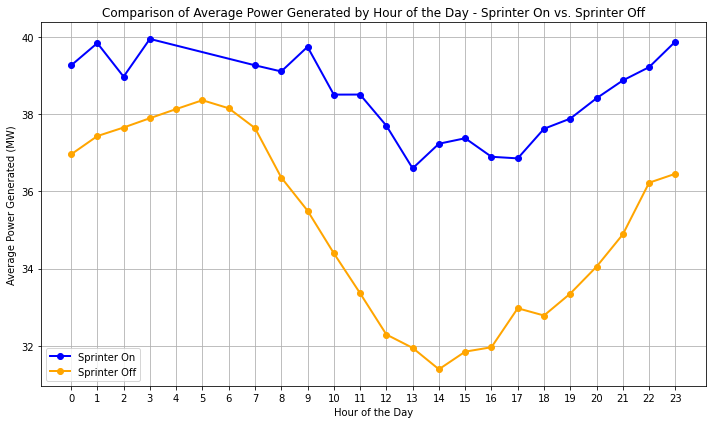

In [202]:
# Extract the hour from the 'Date' column
df['Hour'] = df['Date'].dt.hour

# Calculate the average power for each hour and Sprinter status
average_power_by_hour_sprinter_on = df[df['is_on']]['Gross Power Generated (MW)'].groupby(df['Hour']).mean()
average_power_by_hour_sprinter_off = df[~df['is_on']]['Gross Power Generated (MW)'].groupby(df['Hour']).mean()

# Create a scatter line plot
plt.figure(figsize=(10, 6))
plt.plot(average_power_by_hour_sprinter_on.index, average_power_by_hour_sprinter_on, marker='o', color='blue', linestyle='-', linewidth=2, label='Sprinter On')
plt.plot(average_power_by_hour_sprinter_off.index, average_power_by_hour_sprinter_off, marker='o', color='orange', linestyle='-', linewidth=2, label='Sprinter Off')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Power Generated (MW)')
plt.title('Comparison of Average Power Generated by Hour of the Day - Sprinter On vs. Sprinter Off')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [203]:
df

,Date,Gross Power Generated (MW),Sprint System (L/HR),is_on,Week,Month,Hour
0,2023-05-01 15:00:00,31.004971,0.00000,False,2023-18,5,15
1,2023-05-01 16:00:00,31.054153,0.00000,False,2023-18,5,16
2,2023-05-01 17:00:00,31.094471,0.00000,False,2023-18,5,17
3,2023-05-01 18:00:00,31.212444,0.00000,False,2023-18,5,18
4,2023-05-01 19:00:00,31.610483,0.00000,False,2023-18,5,19
...,...,...,...,...,...,...,...
2588,2023-08-17 11:00:00,30.188789,0.00000,False,2023-33,8,11
2589,2023-08-17 12:00:00,34.486267,673.26282,True,2023-33,8,12
2590,2023-08-17 13:00:00,35.054607,816.41357,True,2023-33,8,13
2591,2023-08-17 14:00:00,34.596741,814.90936,True,2023-33,8,14


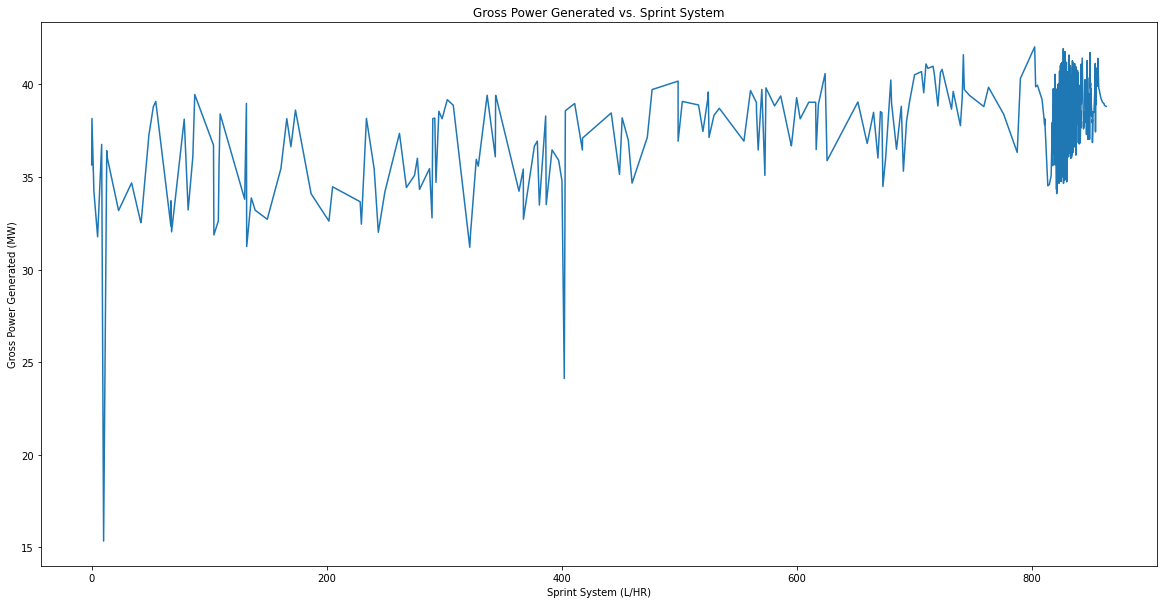

In [213]:
plt.figure(figsize=(20, 10))

# Create a line plot
sns.lineplot(data=df, x="Sprint System (L/HR)", y="Gross Power Generated (MW)")

# Add titles to the plot and axes
plt.title('Gross Power Generated vs. Sprint System')
plt.xlabel('Sprint System (L/HR)')
plt.ylabel('Gross Power Generated (MW)')

plt.show()

As the volume of the spirnter increases, the gross power increases every so slightly if you to draw a correlation line, but could be considered insignficant

In [1]:
import pandas as pd

df = pd.read_csv('staging_data/dummy_dag_2023-08-20_2023-08-20T19:38:29.826554+00:00_transformed.csv')
print(df.dtypes)

Rk        object
Player    object
Pos       object
Age       object
dtype: object


In [8]:
df = df.head()
df

,Rk,Player,Pos,Age
0,1,Precious Achiuwa,PF,21
1,2,Jaylen Adams,PG,24
2,3,Steven Adams,C,27
3,4,Bam Adebayo,C,23
4,5,LaMarcus Aldridge,C,35


In [9]:
df = df.astype({'Rk':'int', 'Age':'int'})


In [10]:
print(df.dtypes)

Rk         int64
Player    object
Pos       object
Age        int64
dtype: object
